In [1]:
%matplotlib inline

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import os
import re
from datetime import datetime
import pytz

In [271]:
path_resp = '/home/mike/w/bci_erp/python/sampleData/run9/oddball_run_2017-02-05_15-02-45.csv'
# path_2 = '/home/mike/w/bci_erp/python/sampleData/oddball_run_2017-02-04_13-02-08.txt'
resp = pd.read_csv(path_resp)
# resp.columns = ['time', 'unixtime', 'resp', 'tone', 'ecode', 'label']
resp['unixtime'] = pd.to_numeric(resp['unixtime'])
resp.head()

,isotime,unixtime,resp,tone,type,label
0,2017-02-05T15:02:45.234-05:00,1486324965234,0,0,254,start experiment
1,2017-02-05T15:02:48.243-05:00,1486324968243,0,F4,4,stimulus_freq
2,2017-02-05T15:02:48.720-05:00,1486324968720,1,0,8,response_freq
3,2017-02-05T15:02:50.241-05:00,1486324970241,0,G5,6,stimulus_infreq
4,2017-02-05T15:02:50.839-05:00,1486324970839,2,0,10,response_infreq


In [272]:
# pd.to_datetime(resp['unixtime']/1000, unit='s')

In [273]:
path_bci = '/home/mike/w/bci_erp/python/sampleData/run9/OpenBCI-RAW-ob_2017-02-05_15-00-49.txt'
bci = pd.read_csv(path_bci, sep=', ', skiprows=6, header=None)
chan_columns = [str(i) for i in range(1,9)]
bci.columns = ['ticks'] + chan_columns + ['a', 'b', 'c', 'unixtime']
bci['unixtime'] = pd.to_numeric(bci['unixtime'])
bci.head()

/home/mike/ve/erp/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,ticks,1,2,3,4,5,6,7,8,a,b,c,unixtime
0,2,-38.74,-43254.51,-5822.72,21606.78,-13614.67,567.69,-73030.12,-50432.22,0.0,0.0,0.0,1.486325e+12
1,3,-104.29,-43376.00,-5807.01,21603.34,-13660.63,556.92,-73994.53,-50476.85,0.0,0.0,0.0,1.486325e+12
2,4,-112.47,-43370.86,-5852.40,21568.18,-13696.54,520.84,-72999.34,-50487.52,0.0,0.0,0.0,1.486325e+12
3,5,-45.26,-43233.19,-5872.09,21553.85,-13671.31,509.87,-71929.90,-50443.57,0.0,0.0,0.0,1.486325e+12
4,6,-28.34,-43218.15,-5820.48,21590.76,-13627.68,545.72,-72789.57,-50428.13,0.0,0.0,0.0,1.486325e+12


In [274]:
fname = os.path.basename(path_bci)
fname

'OpenBCI-RAW-ob_2017-02-05_15-00-49.txt'

In [275]:
datetime_re = r'[\d]{4}-[\d]{2}-[\d]{2}_[\d]{2}-[\d]{2}-[\d]{2}'
datetime_fmt = '%Y-%m-%d_%H-%M-%S'

In [276]:
dt = re.findall(datetime_re, fname)[0]
dt

'2017-02-05_15-00-49'

In [277]:
pt = pd.to_datetime(dt, format=datetime_fmt)
pt

Timestamp('2017-02-05 15:00:49')

In [278]:
tz_est = pytz.timezone('EST')

In [279]:
pt = datetime.strptime(dt, datetime_fmt)
pt

datetime.datetime(2017, 2, 5, 15, 0, 49)

In [280]:
ptz = tz_est.localize(pt)
ptz

datetime.datetime(2017, 2, 5, 15, 0, 49, tzinfo=<StaticTzInfo 'EST'>)

In [281]:
unix_starttime = ptz.strftime('%s')
unix_starttime

'1486324849'

In [282]:
resp.sort_values('unixtime', inplace=True)
resp['datetime'] = pd.to_datetime(resp['unixtime']/1000, unit='s')

In [283]:
resp.iloc[0]

isotime     2017-02-05T15:02:45.234-05:00
unixtime                    1486324965234
resp                                    0
tone                                    0
type                                  254
label                    start experiment
datetime       2017-02-05 20:02:45.234000
Name: 0, dtype: object

In [284]:
bci.iloc[0]

ticks                 2
1                -38.74
2              -43254.5
3              -5822.72
4               21606.8
5              -13614.7
6                567.69
7              -73030.1
8              -50432.2
a                     0
b                     0
c                     0
unixtime    1.48632e+12
Name: 0, dtype: object

In [285]:
pd.to_datetime(resp['unixtime'][0]/1000, unit='s')

Timestamp('2017-02-05 20:02:45.234000')

In [286]:
pd.to_datetime(bci['unixtime'][0]/1000, unit='s')

Timestamp('2017-02-05 20:01:15.268000')

In [287]:
# I have no idea how this is infering the date from the time alone. Probably will break tomorrow
# bci['time2'] = pd.to_datetime(bci['time'], infer_datetime_format=True)
# bci['time3'] = pd.to_numeric(bci['time2']) *1e-6 # to ms

In [288]:
bci['unixtime'][0]

1486324875268.0

In [289]:
t0 = bci.loc[0, 'unixtime'] 
t0r = resp.loc[0, 'unixtime']
delta_ms = t0r-t0
print(t0, t0r, delta_ms, delta_ms/1000)

1.48632487527e+12 1486324965234 89966.0 89.966


In [290]:
bci.head()

,ticks,1,2,3,4,5,6,7,8,a,b,c,unixtime
0,2,-38.74,-43254.51,-5822.72,21606.78,-13614.67,567.69,-73030.12,-50432.22,0.0,0.0,0.0,1.486325e+12
1,3,-104.29,-43376.00,-5807.01,21603.34,-13660.63,556.92,-73994.53,-50476.85,0.0,0.0,0.0,1.486325e+12
2,4,-112.47,-43370.86,-5852.40,21568.18,-13696.54,520.84,-72999.34,-50487.52,0.0,0.0,0.0,1.486325e+12
3,5,-45.26,-43233.19,-5872.09,21553.85,-13671.31,509.87,-71929.90,-50443.57,0.0,0.0,0.0,1.486325e+12
4,6,-28.34,-43218.15,-5820.48,21590.76,-13627.68,545.72,-72789.57,-50428.13,0.0,0.0,0.0,1.486325e+12


In [291]:
# tmid_bci = bci.loc[len(bci) // 2, 'time']
# tmid_resp = resp.loc[len(resp) // 2, 'time']
# delta_t = tmid_resp-tmid_bci
# print(tmid_bci, tmid_resp, delta_t, t0)

resp['latency'] = resp['unixtime'] - t0 
bci['latency'] = bci['unixtime'] - t0

In [292]:
resp.head()

,isotime,unixtime,resp,tone,type,label,datetime,latency
0,2017-02-05T15:02:45.234-05:00,1486324965234,0,0,254,start experiment,2017-02-05 20:02:45.234,89966.0
1,2017-02-05T15:02:48.243-05:00,1486324968243,0,F4,4,stimulus_freq,2017-02-05 20:02:48.243,92975.0
2,2017-02-05T15:02:48.720-05:00,1486324968720,1,0,8,response_freq,2017-02-05 20:02:48.720,93452.0
3,2017-02-05T15:02:50.241-05:00,1486324970241,0,G5,6,stimulus_infreq,2017-02-05 20:02:50.241,94973.0
4,2017-02-05T15:02:50.839-05:00,1486324970839,2,0,10,response_infreq,2017-02-05 20:02:50.839,95571.0


In [293]:
tonef = resp['tone'].replace({'F4':1, 'G5':2, 'F4': 0})
resp['tonef'] = pd.Series(tonef, dtype='float64')
# resp['tonef'].dtype

In [294]:
resp.dtypes

isotime             object
unixtime             int64
resp                 int64
tone                object
type                 int64
label               object
datetime    datetime64[ns]
latency            float64
tonef              float64
dtype: object

In [295]:
resp

,isotime,unixtime,resp,tone,type,label,datetime,latency,tonef
0,2017-02-05T15:02:45.234-05:00,1486324965234,0,0,254,start experiment,2017-02-05 20:02:45.234,89966.0,0.0
1,2017-02-05T15:02:48.243-05:00,1486324968243,0,F4,4,stimulus_freq,2017-02-05 20:02:48.243,92975.0,0.0
2,2017-02-05T15:02:48.720-05:00,1486324968720,1,0,8,response_freq,2017-02-05 20:02:48.720,93452.0,0.0
3,2017-02-05T15:02:50.241-05:00,1486324970241,0,G5,6,stimulus_infreq,2017-02-05 20:02:50.241,94973.0,2.0
4,2017-02-05T15:02:50.839-05:00,1486324970839,2,0,10,response_infreq,2017-02-05 20:02:50.839,95571.0,0.0
5,2017-02-05T15:02:52.374-05:00,1486324972374,0,F4,4,stimulus_freq,2017-02-05 20:02:52.374,97106.0,0.0
6,2017-02-05T15:02:53.028-05:00,1486324973028,1,0,8,response_freq,2017-02-05 20:02:53.028,97760.0,0.0
7,2017-02-05T15:02:54.639-05:00,1486324974639,0,F4,4,stimulus_freq,2017-02-05 20:02:54.639,99371.0,0.0
8,2017-02-05T15:02:55.111-05:00,1486324975111,1,0,8,response_freq,2017-02-05 20:02:55.111,99843.0,0.0
9,2017-02-05T15:02:57.718-05:00,1486324977718,0,F4,4,stimulus_freq,2017-02-05 20:02:57.718,102450.0,0.0


In [296]:
basedir = os.path.dirname(path_resp)
export_file = resp[['type', 'latency']]
export_name = basedir + '/resp_events2_{}.txt'.format(path_resp[-16:-4])
export_file.to_csv(export_name, index=0)
print(export_name)
export_file.head()

/home/mike/w/bci_erp/python/sampleData/run9/resp_events2_-05_15-02-45.txt


,type,latency
0,254,89966.0
1,4,92975.0
2,8,93452.0
3,6,94973.0
4,10,95571.0


In [297]:
pd.to_datetime('2017-02-05T11:16:23.060-05:00')

Timestamp('2017-02-05 16:16:23.060000')

In [298]:
resp.iloc[0]

isotime     2017-02-05T15:02:45.234-05:00
unixtime                    1486324965234
resp                                    0
tone                                    0
type                                  254
label                    start experiment
datetime       2017-02-05 20:02:45.234000
latency                             89966
tonef                                   0
Name: 0, dtype: object

In [299]:
bci['unixtime'][0], resp['unixtime'][0]

(1486324875268.0, 1486324965234)

In [300]:
bci = bci[pd.notnull(bci['unixtime'])]

In [301]:
sum(pd.isnull(bci['unixtime']))

0

In [302]:
bci['unixtime'] = pd.Series(bci['unixtime'], dtype='int64')
bci['unixtime'].dtype

dtype('int64')

In [303]:
resp['unixtime'] = pd.Series(resp['unixtime'], dtype=int)
resp['unixtime'].dtype

dtype('int64')

In [304]:
# bci2.merge(resp, 'outer', on='time', sort=True)

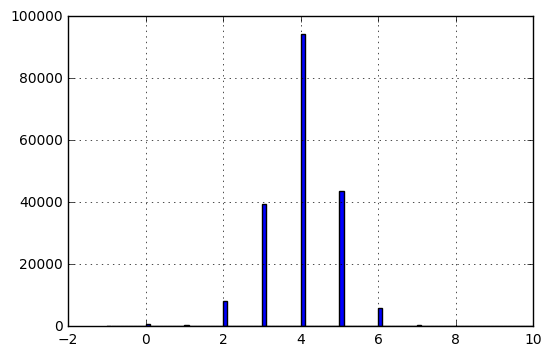

In [305]:
bci['unixtime'].diff().hist(bins=np.linspace(-1,10,100))

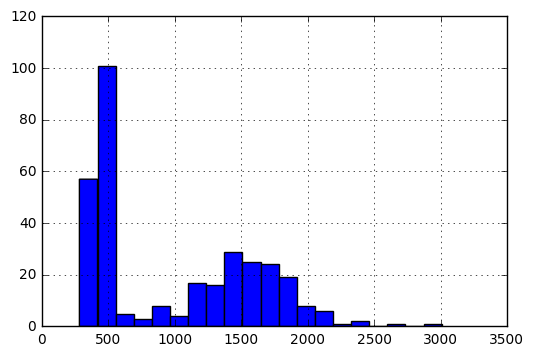

In [306]:
resp['unixtime'].diff().hist(bins=20)

In [307]:
# bci.merge(resp, 'outer', on='time', sort=True).to_csv('testmerge.csv')
mframe = pd.merge_asof(bci, resp, on='unixtime', allow_exact_matches=False)

In [308]:
mframe

,ticks,1,2,3,4,5,6,7,8,a,...,unixtime,latency_x,isotime,resp,tone,type,label,datetime,latency_y,tonef
0,2,-38.74,-43254.51,-5822.72,21606.78,-13614.67,567.69,-73030.12,-50432.22,0.00,...,1486324875268,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,3,-104.29,-43376.00,-5807.01,21603.34,-13660.63,556.92,-73994.53,-50476.85,0.00,...,1486324875272,4.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,4,-112.47,-43370.86,-5852.40,21568.18,-13696.54,520.84,-72999.34,-50487.52,0.00,...,1486324875277,9.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,5,-45.26,-43233.19,-5872.09,21553.85,-13671.31,509.87,-71929.90,-50443.57,0.00,...,1486324875279,11.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,6,-28.34,-43218.15,-5820.48,21590.76,-13627.68,545.72,-72789.57,-50428.13,0.00,...,1486324875284,16.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5,7,-83.73,-43345.98,-5793.10,21610.69,-13643.42,563.06,-73962.03,-50470.35,0.62,...,1486324875288,20.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
6,8,-106.30,-43376.17,-5841.05,21572.58,-13693.24,524.42,-73259.23,-50493.80,0.00,...,1486324875293,25.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
7,9,-62.76,-43284.62,-5879.94,21561.77,-13667.38,515.95,-71983.99,-50453.27,0.00,...,1486324875297,29.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
8,10,-34.44,-43226.62,-5837.87,21599.92,-13612.86,557.27,-72532.08,-50423.75,0.00,...,1486324875301,33.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
9,11,-81.27,-43349.69,-5804.64,21614.99,-13634.56,568.09,-73872.05,-50465.07,0.00,...,1486324875305,37.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
mframe['dtone'] = mframe['tonef'].diff().fillna(0)
mframe['oddball'] = mframe['dtone'] == 2
mframe.drop(['a', 'b', 'c', 'dtone'], axis=1, inplace=True)

In [ ]:
mframe.to_csv('testmerge.csv')
print(mframe.shape, bci.shape)

In [ ]:
resp['tone'].dtype

In [ ]:
import os
orig = os.getcwd()

In [ ]:
erp_index = mframe[mframe['oddball']].index
for el in erp_index:
    print(el)

In [ ]:
sampleRate = 250 # Hz
erpTime = 1000 # sec
erp_window = 1000 # ms

In [ ]:
mframe.iloc[erp_index[0]:erp_index[0]+erp_window]

In [ ]:
erps = []
for idx in erp_index:
    erps.append(mframe[chan_columns].iloc[idx:idx+erp_window])

In [ ]:
erps[0].as_matrix()

In [ ]:
meta_frame = np.zeros((len(erps), erps[0].shape[0], erps[1].shape[1]))
meta_frame.shape

In [ ]:
for i, item in enumerate(erps):
    meta_frame[i] = np.array(item)

In [ ]:
meta_frame.shape

In [ ]:
erp_mean = meta_frame.mean(axis=0)
erp_mean.shape

In [ ]:
erp_mean.mean(axis=1).shape

In [ ]:
p300 = erp_mean.mean(axis=1)
plt.plot(p300)

In [ ]:
def butter_lowpass_filter(data, cutoff, fs=1., order=1, axis=0, analog=False):
    # todo: add option to filtfilt or lfilter
    """
    Apply a digital Butterworth low-pass filter.
    :param data: array-like
    :param cutoff: Critical frequency, Hz
    :param fs: Sampling freqency, Hz
    :param order: Order of
    :param axis: ndarray axis, 0='long' axis, 1='row' axis
    :return:
    """
    nyquistFreqInRads = (2*np.pi*fs)/2
    Wn = 2*np.pi*cutoff / (nyquistFreqInRads)
    b, a = signal.butter(order, Wn, btype='low', analog=analog)
    y = signal.filtfilt(b, a, data, axis=axis)
    return y

In [ ]:
p300f = butter_lowpass_filter(p300, 0.25, 250)
plt.plot(p300)
plt.plot(p300f)

In [ ]:
p300_detrend = p300-p300f

In [ ]:
plt.plot(p300_detrend)

In [ ]:
plt.plot(butter_lowpass_filter(p300_detrend, 10, 250))

In [ ]:
meta_p3s = meta_frame.mean(axis=0)

In [ ]:
meta_detrend = meta_p3s - butter_lowpass_filter(meta_p3s, .25, 250, axis=0)
plt.plot(meta_detrend)

In [ ]:
meta_detrend[:,3] *= -1

In [ ]:
plt.plot(meta_detrend)

In [ ]:
plt.plot(butter_lowpass_filter(meta_detrend, 10, 250))
chan=7
plt.plot(butter_lowpass_filter(meta_detrend[:,chan], 10, 250), 'c')
plt.plot(butter_lowpass_filter(meta_detrend[:,chan], 10, 250), 'k--')
plt.legend(range(8))

In [ ]:
plt.plot(butter_lowpass_filter(meta_detrend.mean(axis=1), 15, 250))
plt.plot(meta_detrend[:,0]*0)